<a href="https://colab.research.google.com/github/SandraQA69/Challenge_TelecomX_Parte2/blob/main/Actualiza1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json

# Cargar el archivo JSON
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

# Convertir a DataFrame y normalizar columnas anidadas
df = pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [2]:
# Mostrar info general
df.info()

# Revisar columnas y valores nulos
print(df.isnull().sum())

# Convertir valores de 'Charges.Total' a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Convertir 'Churn' a binario (1 = Yes, 0 = No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de churn
sns.countplot(x='Churn', data=df)
plt.title("Distribución de Cancelaciones (Churn)")
plt.show()

# Churn por tipo de contrato
sns.countplot(x='account.Contract', hue='Churn', data=df)
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=45)
plt.show()

# Correlación entre variables numéricas
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


In [5]:
# 1. Ver columnas únicas o identificadores
print(df.columns)

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [7]:
# Eliminación de columnas irrelevantes y renombrar traduciendo al español

df = df.rename(columns={
    'Churn': 'Cancelacion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes',
    'customer.tenure': 'AntiguedadMeses',
    'phone.PhoneService': 'ServicioTelefonico',
    'phone.MultipleLines': 'MultiplesLineas',
    'internet.InternetService': 'ServicioInternet',
    'internet.OnlineSecurity': 'SeguridadEnLinea',
    'internet.OnlineBackup': 'RespaldoEnLinea',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'TVStreaming',
    'internet.StreamingMovies': 'PeliculasStreaming',
    'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'FacturacionSinPapel',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargoMensual',
    'account.Charges.Total': 'CargoTotal'
})


In [8]:
columnas_categoricas = [
    'Genero',
    'TienePareja',
    'TieneDependientes',
    'ServicioTelefonico',
    'MultiplesLineas',
    'ServicioInternet',
    'SeguridadEnLinea',
    'RespaldoEnLinea',
    'ProteccionDispositivo',
    'SoporteTecnico',
    'TVStreaming',
    'PeliculasStreaming',
    'TipoContrato',
    'FacturacionSinPapel',
    'MetodoPago'
]


In [9]:
# One-hot encoding de las columnas categóricas
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)


In [10]:
# Verificamos tipos de datos después de codificar
print(df_encoded.dtypes.value_counts())

# También puedes usar esto para asegurarte que no quedan objetos (strings)
print(df_encoded.select_dtypes(include=['object']).columns)


bool       26
float64     3
int64       2
Name: count, dtype: int64
Index([], dtype='object')


In [11]:
# Conteo de cada clase
conteo = df_encoded['Cancelacion'].value_counts()

# Proporción (en %)
proporcion = df_encoded['Cancelacion'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases:")
print(conteo)

print("\nProporción de clases (%):")
print(proporcion)


Conteo de clases:
Cancelacion
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de clases (%):
Cancelacion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [13]:
# Conteo de cada clase
conteo = df_encoded['Cancelacion'].value_counts()

# Proporción (en %)
proporcion = df_encoded['Cancelacion'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases:")
print(conteo)

print("\nProporción de clases (%):")
print(proporcion)


Conteo de clases:
Cancelacion
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de clases (%):
Cancelacion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


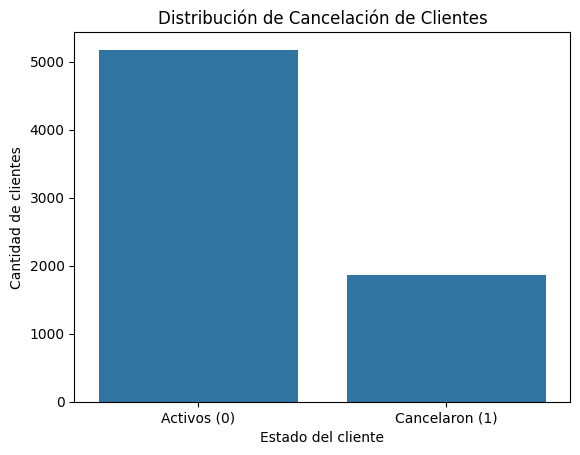

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de barras
sns.countplot(x='Cancelacion', data=df_encoded)
plt.title('Distribución de Cancelación de Clientes')
plt.xticks([0, 1], ['Activos (0)', 'Cancelaron (1)'])
plt.ylabel('Cantidad de clientes')
plt.xlabel('Estado del cliente')
plt.show()


## ✍️ Evaluación del Balance de Clases
Al analizar la variable objetivo Cancelacion, se observa que el 26,54% de los clientes cancelaron el servicio, mientras que el 73,46% permanecieron activos.

Esta distribución evidencia un desbalance moderado entre las clases. La mayoría de los clientes no han cancelado, lo cual podría influir en el rendimiento de los modelos predictivos si no se toman medidas adecuadas.

Para mitigar este impacto, se recomienda:

Usar métricas adecuadas como AUC-ROC o F1-score (en lugar de accuracy).

Considerar técnicas de balanceo de clases, como oversampling (SMOTE) o undersampling.

Aplicar modelos que sean robustos frente al desbalance, como árboles de decisión, Random Forest o XGBoost con pesos ajustados.